In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.initializers import VarianceScaling
from keras.regularizers import l2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from sklearn import datasets    
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [13]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

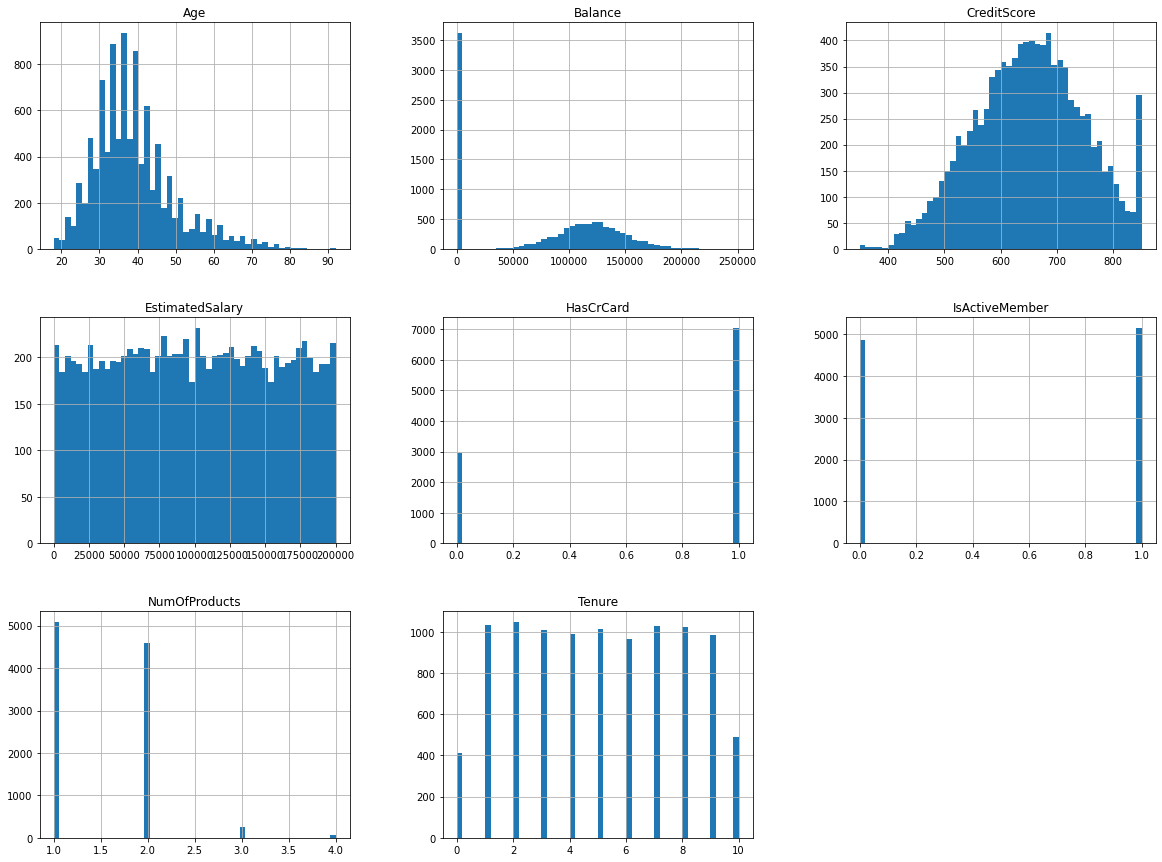

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [14]:
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20,15))
plt.show()

X = X.values
y = y.values
print(X)
print(y)

In [15]:
# label encoding for the gender cat
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [16]:
# one hot encoding for cat enc and col transfer to combine
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [17]:
# feature scalling
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
# splitting using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# creating the neural network
def create_network(optimizer='RMSprop'):
        model = Sequential()
        model.add(Dense(units=36, input_shape=(X_train.shape[1],), 
                        kernel_regularizer=l2(0.001),           # weight regularizer
                        kernel_initializer=VarianceScaling(),   # initializer
                        activation='relu'))
        model.add(Dense(units=28, 
                        kernel_regularizer=l2(0.01),            # weight regularizer
                        kernel_initializer=VarianceScaling(),   # initializer                   
                        activation='relu'))
        model.add(Dense(units=1, activation='sigmoid'))
    
        # Compile the Model
        model.compile(loss='binary_crossentropy', optimizer = optimizer, 
                      metrics=['acc','mae'])    

        return model

In [20]:
# building the network
neural_network = KerasClassifier(build_fn=create_network, verbose=1)

In [21]:
# fitting on train data
neural_network.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 675us/step - loss: 0.7300 - acc: 0.7934 - mae: 0.3264
Epoch 2/100
250/250 [==============================] - 0s 690us/step - loss: 0.5207 - acc: 0.8129 - mae: 0.2781
Epoch 3/100
250/250 [==============================] - 0s 676us/step - loss: 0.4762 - acc: 0.8194 - mae: 0.2717
Epoch 4/100
250/250 [==============================] - 0s 669us/step - loss: 0.4457 - acc: 0.8354 - mae: 0.2562
Epoch 5/100
250/250 [==============================] - 0s 668us/step - loss: 0.4309 - acc: 0.8414 - mae: 0.2532
Epoch 6/100
250/250 [==============================] - 0s 699us/step - loss: 0.4028 - acc: 0.8512 - mae: 0.2347
Epoch 7/100
250/250 [==============================] - 0s 702us/step - loss: 0.4011 - acc: 0.8551 - mae: 0.2331
Epoch 8/100
250/250 [==============================] - 0s 737us/step - loss: 0.3859 - acc: 0.8614 - mae: 0.2238
Epoch 9/100
250/250 [==============================] - 0s 683us/step - loss: 0.3849 - acc: 0.8547 - mae:

250/250 [==============================] - 0s 674us/step - loss: 0.3313 - acc: 0.8765 - mae: 0.1921
Epoch 74/100
250/250 [==============================] - 0s 667us/step - loss: 0.3477 - acc: 0.8658 - mae: 0.2041
Epoch 75/100
250/250 [==============================] - 0s 671us/step - loss: 0.3358 - acc: 0.8719 - mae: 0.1952
Epoch 76/100
250/250 [==============================] - 0s 657us/step - loss: 0.3381 - acc: 0.8720 - mae: 0.1964
Epoch 77/100
250/250 [==============================] - 0s 696us/step - loss: 0.3348 - acc: 0.8677 - mae: 0.1961
Epoch 78/100
250/250 [==============================] - 0s 680us/step - loss: 0.3485 - acc: 0.8677 - mae: 0.2025
Epoch 79/100
250/250 [==============================] - 0s 654us/step - loss: 0.3560 - acc: 0.8587 - mae: 0.2088
Epoch 80/100
250/250 [==============================] - 0s 672us/step - loss: 0.3417 - acc: 0.8652 - mae: 0.1987
Epoch 81/100
250/250 [==============================] - 0s 680us/step - loss: 0.3566 - acc: 0.8592 - mae: 0.2

In [35]:
# Evaluate model
from sklearn.metrics import accuracy_score
def make_predictions(X_test,y_test,y_pred):
    print()
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y_test, y_pred); print("\nConfusion Matrix:\n", cm)
    cr = classification_report(y_test, y_pred); print("\nClassification Report:\n", cr)
    acc = accuracy_score(y_test, y_pred); print("\nAccuracy Score: \n", acc * 100.0)

In [36]:
y_pred = neural_network.predict(X_test)
make_predictions(X_test,y_test,y_pred)

63/63 [==============================] - 0s 536us/step


Confusion Matrix:
 [[1513   82]
 [ 192  213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000


Accuracy Score: 
 86.3


In [31]:
# fine tuning hyper parameters using 
epochs = [30,150, 200, 250]
batches = [5, 10,50,80, 100]
optimizers = ['rmsprop', 'adam', 'sgd']
# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters,cv = 3, n_jobs=-1)

# Fit grid search
grid_result = grid.fit(X_train, y_train)
print(); print(grid_result.best_params_)

Epoch 1/30
1600/1600 [==============================] - 1s 675us/step - loss: 0.6479 - acc: 0.7998 - mae: 0.2974
Epoch 2/30
1600/1600 [==============================] - 1s 678us/step - loss: 0.4300 - acc: 0.8482 - mae: 0.2420
Epoch 3/30
1600/1600 [==============================] - 1s 674us/step - loss: 0.4051 - acc: 0.8496 - mae: 0.2327
Epoch 4/30
1600/1600 [==============================] - 1s 684us/step - loss: 0.3937 - acc: 0.8514 - mae: 0.2254
Epoch 5/30
1600/1600 [==============================] - 1s 686us/step - loss: 0.3749 - acc: 0.8565 - mae: 0.2178
Epoch 6/30
1600/1600 [==============================] - 1s 692us/step - loss: 0.3738 - acc: 0.8542 - mae: 0.2169
Epoch 7/30
1600/1600 [==============================] - 1s 685us/step - loss: 0.3644 - acc: 0.8615 - mae: 0.2125
Epoch 8/30
1600/1600 [==============================] - 1s 685us/step - loss: 0.3613 - acc: 0.8624 - mae: 0.2128
Epoch 9/30
1600/1600 [==============================] - 1s 682us/step - loss: 0.3712 - acc: 0.85

In [38]:
y_pred_grid = grid_result.predict(X_test)
y_pred_grid = (y_pred_grid > 0.5)
make_predictions(X_test,y_test,y_pred_grid)

400/400 [==============================] - 0s 453us/step


Confusion Matrix:
 [[1534   61]
 [ 210  195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.48      0.59       405

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000


Accuracy Score: 
 86.45


In [51]:
# using custom antirectifier layer
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
class Antirectifier(layers.Layer):
    def __init__(self, initializer="he_normal", **kwargs):
        super(Antirectifier, self).__init__(**kwargs)
        self.initializer = keras.initializers.get(initializer)

    def build(self, input_shape):
        output_dim = input_shape[-1]
        self.kernel = self.add_weight(
            shape=(output_dim * 2, output_dim),
            initializer=self.initializer,
            name="kernel",
            trainable=True,
        )

    def call(self, inputs):
        inputs -= tf.reduce_mean(inputs, axis=-1, keepdims=True)
        pos = tf.nn.relu(inputs)
        neg = tf.nn.relu(-inputs)
        concatenated = tf.concat([pos, neg], axis=-1)
        mixed = tf.matmul(concatenated, self.kernel)
        return mixed

    def get_config(self):
        # Implement get_config to enable serialization. This is optional.
        base_config = super(Antirectifier, self).get_config()
        config = {"initializer": keras.initializers.serialize(self.initializer)}
        return dict(list(base_config.items()) + list(config.items()))

In [63]:
def create_network2(optimizer='RMSprop'):
        model = Sequential()
        model.add(Dense(units=36, input_shape=(X_train.shape[1],), 
                        kernel_regularizer=l2(0.001),           # weight regularizer
                        kernel_initializer=VarianceScaling(),   # initializer
                        activation='relu'))
        model.add(Dense(units=28, 
                        kernel_regularizer=l2(0.01),            # weight regularizer
                        kernel_initializer=VarianceScaling(),   # initializer                   
                        activation=Antirectifier()))
      #  model.add(Antirectifier())
        model.add(Dense(units=1, activation='sigmoid'))
    
        # Compile the Model
        model.compile(loss='binary_crossentropy', optimizer = optimizer, 
                      metrics=['acc','mae'])    

        return model

In [64]:
# Compile the model
neural_network2 = KerasClassifier(build_fn=create_network2, verbose=1)
# Train the model
neural_network2.fit(X_train, y_train, batch_size=5, epochs=30, validation_split=0.15)

y_pred = neural_network.predict(X_test)
make_predictions(X_test,y_test,y_pred)

Epoch 1/30
1360/1360 [==============================] - 4s 1ms/step - loss: 0.6705 - acc: 0.8050 - mae: 0.2836 - val_loss: 0.4618 - val_acc: 0.8475 - val_mae: 0.2426
Epoch 2/30
1360/1360 [==============================] - 4s 3ms/step - loss: 0.4446 - acc: 0.8465 - mae: 0.2255 - val_loss: 0.4244 - val_acc: 0.8500 - val_mae: 0.2430
Epoch 3/30
1360/1360 [==============================] - 2s 1ms/step - loss: 0.4038 - acc: 0.8564 - mae: 0.2117 - val_loss: 0.3945 - val_acc: 0.8617 - val_mae: 0.2077
Epoch 4/30
1360/1360 [==============================] - 2s 1ms/step - loss: 0.4078 - acc: 0.8576 - mae: 0.2122 - val_loss: 0.3903 - val_acc: 0.8633 - val_mae: 0.2025
Epoch 5/30
1360/1360 [==============================] - 2s 1ms/step - loss: 0.3910 - acc: 0.8583 - mae: 0.2044 - val_loss: 0.3809 - val_acc: 0.8675 - val_mae: 0.2027
Epoch 6/30
1360/1360 [==============================] - 2s 1ms/step - loss: 0.3795 - acc: 0.8538 - mae: 0.2002 - val_loss: 0.3895 - val_acc: 0.8592 - val_mae: 0.2051
Epoc

c:\users\sathvik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sathvik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sathvik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera